In [1]:
!pip install pandas

In [4]:
import pandas as pd
data = pd.read_csv('athlete_events.csv')

In [5]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [16]:
# 1
# data['Games','City'].unique()
data.groupby(['Games','City'], as_index=False)['Games','City'].first()

<ipython-input-16-aaef3ea6cefb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Games','City'], as_index=False)['Games','City'].first()


,Games,City
0,1896 Summer,Athina
1,1900 Summer,Paris
2,1904 Summer,St. Louis
3,1906 Summer,Athina
4,1908 Summer,London
5,1912 Summer,Stockholm
6,1920 Summer,Antwerpen
7,1924 Summer,Paris
8,1924 Winter,Chamonix
9,1928 Summer,Amsterdam


### 1. How many total unique participants (use ID column) were present at the London 2012 Games?

In [21]:
print(f"{len(data.loc[(data['Games'] == '2012 Summer') & (data['City'] == 'London')]['ID'].unique())} unique participants (use ID column) were present at the London 2012 Games")

10517 unique participants (use ID column) were present at the London 2012 Games


### 2. How many total unique males and total unique females participants were at the Beijing 2008 games?

In [29]:
data.loc[(data['Games'] == '2008 Summer') & (data['City'] == 'Beijing')].drop_duplicates('ID')['Sex'].value_counts()


M    6290
F    4609
Name: Sex, dtype: int64

### 3.  List the top 10 athletes with the most medals

In [158]:
# 3
temp_view = data.loc[data['Medal'].notnull()].groupby(['Name']).agg({"Medal": "count"}).reset_index().sort_values(by = 'Medal', ascending = False)

In [159]:
temp_view

,Name,Medal
18078,"Michael Fred Phelps, II",28
15306,Larysa Semenivna Latynina (Diriy-),18
19348,Nikolay Yefimovich Andrianov,15
3212,Borys Anfiyanovych Shakhlin,13
24378,Takashi Ono,13
...,...,...
10686,Iain Brambell,1
10685,Hyvin Kiyeng Jepkemoi,1
10684,Hyleas Christine Fountain,1
10683,"Hyland DeAndre Jordan, Jr.",1


In [160]:
print("List the top 10 athletes with the most medals")
print(temp_view['Name'].values[:10])

List the top 10 athletes with the most medals
['Michael Fred Phelps, II' 'Larysa Semenivna Latynina (Diriy-)'
 'Nikolay Yefimovich Andrianov' 'Borys Anfiyanovych Shakhlin'
 'Takashi Ono' 'Ole Einar Bjrndalen' 'Edoardo Mangiarotti'
 'Ryan Steven Lochte' 'Birgit Fischer-Schmidt' 'Paavo Johannes Nurmi']


### 4. Make a bar chart (blue color) that shows how many nations participated in each year of the Olympics

<AxesSubplot:title={'center':'Nations Participated in each year'}, xlabel='Year'>

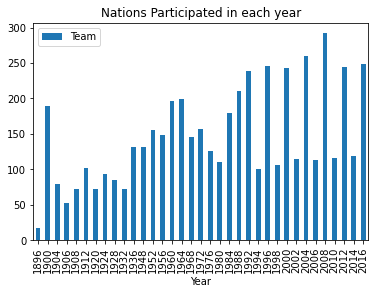

In [142]:
#4
data.groupby('Year').agg({"Team": "nunique"}).reset_index().plot(kind= 'bar', x = 'Year', y = 'Team', title = 'Nations Participated in each year')


### 5. Optional: Make a bar chart (yellow color) that shows the total gold medals Team USA has won since the 2000 games

<AxesSubplot:title={'center':'Gold Medals won by Team USA'}, xlabel='Year'>

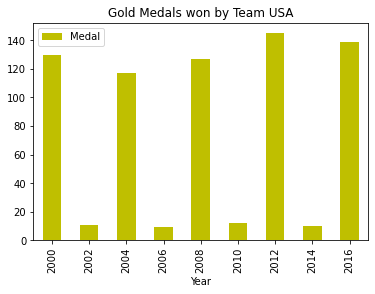

In [162]:
#  Optional: Make a bar chart (yellow color) that shows the total gold medals Team USA has won since the 2000 games

data.loc[(data['NOC']=='USA')&(data['Year']>=2000)& (data['Medal']=='Gold')].groupby(['Year']).agg({"Medal": "count"})\
    .reset_index().plot(kind = 'bar', x= 'Year', y = 'Medal',color = 'y', title= 'Gold Medals won by Team USA')